In [1]:
import numpy as np
import pandas as pd
import gc

C:\Users\zhengzong\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
chunksize = 100000 * 400
df = pd.read_csv(r"D:\BaiduNetdiskDownload\202003.csv", chunksize=chunksize, iterator=True) ### 这里切换 年份的数据集

In [4]:
a = df.get_chunk()

In [5]:
df_chunk = a
df_chunk

,出站时间,到达车站编号,卡号,起始车站编号,进站时间,卡大类（99一卡通，1一票卡）,卡的子类型,扣费金额（100倍数，1是员工票或者计次票，0是免费票福利票车站工作票）,卡周期,对账日期,结算日期,安全密钥,闸机号,运营单位,钱包余额,交易序列号
0,2020030313:18:37,151019041,14992300,150996999,2020030313:01:00,99,1,286.0,0,2020030300:00:00,2020030300:00:00,49000210,526262601,74,1650,319
1,2020030313:22:50,151019041,72628606,151019049,2020030312:57:00,99,1,500.0,0,2020030300:00:00,2020030300:00:00,49000208,526262600,74,2100,29
2,2020030313:22:50,151019041,72628606,151019049,2020030312:57:00,99,1,500.0,0,2020030300:00:00,2020030300:00:00,49000208,526262600,74,2100,29
3,2020030313:22:26,151019041,23413174,151019047,2020030313:07:00,99,1,400.0,0,2020030300:00:00,2020030300:00:00,49000208,526262600,74,10200,1092
4,2020030313:19:07,150996557,87981000,150997277,2020030311:57:00,99,1,1.0,0,2020030300:00:00,2020030300:00:00,69000960,520506642,46,1818,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39999995,2020031313:28:41,151019561,46883915,150999077,2020031311:35:00,99,1,31.0,0,2020031300:00:00,2020031300:00:00,69000283,526395660,76,2430,3587
39999996,2020031313:28:41,151019561,46883915,150999077,2020031311:35:00,99,1,2.0,0,2020031300:00:00,2020031300:00:00,69000283,526395660,76,2430,3587
39999997,2020031313:28:41,151019561,46883915,150999077,2020031311:35:00,99,1,269.0,0,2020031300:00:00,2020031300:00:00,69000283,526395660,76,2430,3587
39999998,2020031313:28:41,151019561,46883915,150999077,2020031311:35:00,99,1,0.0,0,2020031300:00:00,2020031300:00:00,69000283,526395660,76,2430,3587


In [6]:
df_chunk['出站时间'] = pd.to_datetime(df_chunk['出站时间'],format="%Y%m%d%H:%M:%S")
df_chunk['进站时间'] = pd.to_datetime(df_chunk['进站时间'],format="%Y%m%d%H:%M:%S")

In [7]:
df_chunk['日期'] = df_chunk['出站时间'].apply(lambda x:str(x.year)+'-'+str(x.month)+'-'+str(x.day))

In [8]:
a = pd.DataFrame(df_chunk.groupby(['卡号'])[['日期','钱包余额']].nunique())

In [9]:
a = a.reset_index()
a

,卡号,日期,钱包余额
0,126,1,1
1,626,1,1
2,1902,8,16
3,2201,1,1
4,2584,2,4
...,...,...,...
1874045,901000187613,1,1
1874046,901010017842,1,1
1874047,906000203810,4,5
1874048,961004042354,1,1


### 聚类

In [10]:
from sklearn.cluster import KMeans 

In [11]:
X = a.copy()
# X['日期_'] = X[['日期']
X = X[['日期','钱包余额']].values

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

# scaler = scaler.fit(X)  # 本质生成 max(x) 和 min(x)
# X = scaler.transform(X)

In [12]:
#Model Build
kmeansmodel = KMeans(n_clusters= 2, init='k-means++', random_state=0)
y_kmeans = kmeansmodel.fit_predict(X)

In [13]:
a['聚类结果'] = y_kmeans

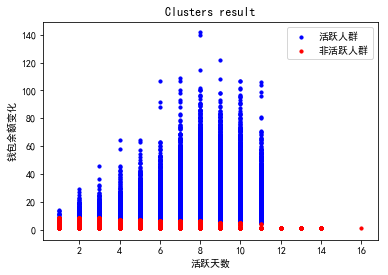

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'blue', label = '活跃人群')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'red', label = '非活跃人群')

#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 12], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters result')
plt.xlabel('活跃天数')
plt.ylabel('钱包余额变化')
plt.legend()


plt.savefig('./20Kmeans1.png', dpi = 400)
plt.show()

In [15]:
a.columns = ['卡号','活跃天数','钱包余额变化','聚类结果']
a.to_csv("./20年活跃天数聚类_两指标.csv",index=False,encoding='utf_8_sig')

#### 活跃用户的百分比 

In [16]:
a.groupby(['聚类结果'])['活跃天数'].mean()

聚类结果
0    7.147941
1    2.381471
Name: 活跃天数, dtype: float64

可以看出类别1为活跃人群

In [17]:
a['聚类结果'].value_counts()

1    1563420
0     310630
Name: 聚类结果, dtype: int64

In [20]:
310630 / (310630 + 1563420) 

0.16575331501293988

活跃用户的百分比为16.75%